In [ ]:
#Load data
import numpy as np
import pandas as pd

data = pd.read_csv('/content/CC GENERAL.csv')


In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.shape

(8950, 18)

In [ ]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Drop data with NaN value
dataset = data.dropna()

In [ ]:
dataset.shape

(8636, 18)

In [ ]:
for i in dataset.columns:
  print(i)
  print(dataset[i].unique())
  print(' ')

CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
 
BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
 
BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.545455 0.875    0.454545 0.636364 0.727273
 0.5      0.888889 0.272727 0.363636 0.666667 0.75     0.857143 0.090909
 0.333333 0.181818 0.6      0.3      0.9      0.833333 0.8      0.2
 0.777778 0.555556 0.25     0.571429 0.4      0.444444 0.       0.714286
 0.1      0.625    0.428571 0.7      0.375    0.166667 0.222222 0.285714
 0.142857 0.125   ]
 
PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
 
ONEOFF_PURCHASES
[   0.    773.17   16.   ...  255.62  734.4  1093.25]
 
INSTALLMENTS_PURCHASES
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
 
CASH_ADVANCE
[   0.       6442.945483  346.81139  ... 8555.409326   36.558778
  127.040008]
 
PURCHASES_FREQUENCY
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.583333 0.3

In [ ]:
dataset = dataset.drop(['CUST_ID'], axis = 1)

In [ ]:
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

1. Hierarchical

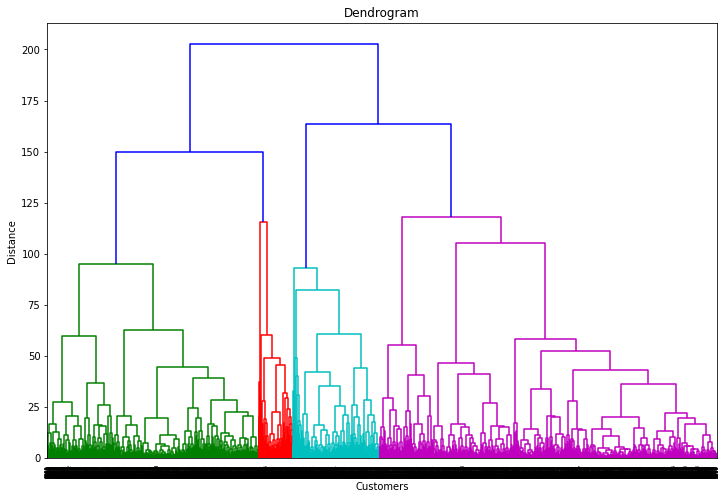

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


plt.figure(figsize = (12,8))
dendogram = sch.dendrogram(sch.linkage(dataset_scaled, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

From the dendrogram, we choose 4 clusters

<function matplotlib.pyplot.show>

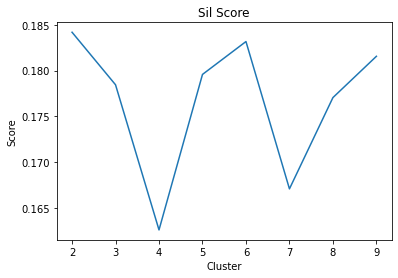

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

list_cluster = []
list_val = []
for i in range(2,10):
  hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
  cluster = hc.fit_predict(dataset_scaled)
  val = silhouette_score(dataset_scaled, cluster)
  list_cluster.append(cluster)
  list_val.append(val)
  
plt.plot(range(2,10),list_val)
plt.title('Sil Score')
plt.xlabel('Cluster')
plt.ylabel('Score')
plt.show

But from the silhouette score, seems that 2 clusters is enough.

In [ ]:
#Training Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

In [ ]:
#Fit the model with data and predict
y_hc = hc.fit_predict(dataset_scaled)

In [ ]:
X_hc = dataset.copy()
X_hc['cluster'] = y_hc
X_hc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [ ]:
pd.pivot_table(dataset, index=list_cluster[0], aggfunc=[np.mean,np.min,np.max])

mean                    ...          amax       
       BALANCE BALANCE_FREQUENCY  ... PURCHASES_TRX TENURE
0  1742.035116          0.847385  ...           162     12
1  1358.185024          0.977280  ...           358     12

[2 rows x 51 columns]

In [ ]:
from sklearn.decomposition import PCA
pca_hc = PCA(n_components = 2)
principal_comp = pca_hc.fit_transform(dataset_scaled)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': y_hc})], axis = 1)

In [ ]:
pca_df.head()

,pca1,pca2,cluster
0,-1.696395,-1.122584,0
1,-1.215677,2.435645,0
2,0.935847,-0.385208,1
3,-1.614638,-0.724587,0
4,0.223697,-0.783614,0


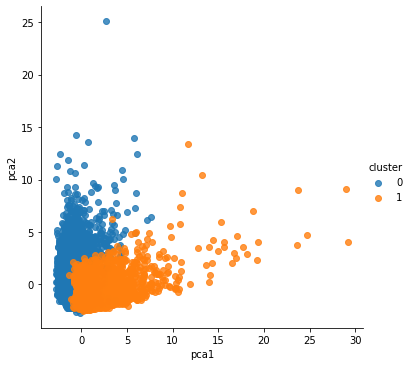

In [ ]:
import seaborn as sns
sns.lmplot(x='pca1', y='pca2', data=pca_df, hue='cluster', fit_reg=False)

<function matplotlib.pyplot.show>

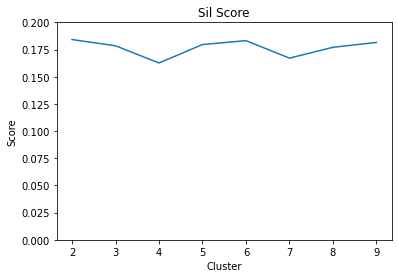

In [ ]:
plt.plot(range(2,10),list_val)
plt.title('Sil Score')
plt.xlabel('Cluster')
plt.ylabel('Score')
plt.ylim(0, 0.2)
plt.show

In [ ]:
list_val

[0.18418454528547495,
 0.17845266791386857,
 0.1626116943237927,
 0.17958078141889866,
 0.18316897479835914,
 0.16709194070846045,
 0.1770535189599759,
 0.18155988301335385]

What if we cluster them based on the second best number of cluster? Let's see

In [ ]:
#Training Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
hc6 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')

In [ ]:
#Fit the model with data and predict
y_hc6 = hc6.fit_predict(dataset_scaled)

In [ ]:
pd.pivot_table(dataset, index=list_cluster[4], aggfunc=[np.mean,np.min,np.max])

mean                    ...          amax       
       BALANCE BALANCE_FREQUENCY  ... PURCHASES_TRX TENURE
0   951.682904          0.809199  ...            79     12
1   954.735370          0.975482  ...           130     12
2  4695.246244          0.976833  ...           162     12
3  3827.688544          0.990316  ...           347     12
4  1130.427868          0.839706  ...            98     11
5  4812.382778          0.956126  ...           358     12

[6 rows x 51 columns]

In [ ]:
from sklearn.decomposition import PCA
pca_hc6 = PCA(n_components = 3)
principal_comp6 = pca_hc6.fit_transform(dataset_scaled)
pca_df6 = pd.DataFrame(data = principal_comp6, columns = ['pca1', 'pca2', 'pca3'])
pca_df6 = pd.concat([pca_df6, pd.DataFrame({'cluster': y_hc6})], axis = 1)

In [ ]:
pca_df6

,pca1,pca2,pca3,cluster
0,-1.696396,-1.122579,0.491532,0
1,-1.215685,2.435654,0.694467,2
2,0.935852,-0.385196,-0.025976,1
3,-1.614638,-0.724585,0.272378,0
4,0.223699,-0.783604,-1.184468,0
...,...,...,...,...
8631,-2.221636,-1.328412,1.643887,4
8632,-0.362325,-2.032252,-0.874980,4
8633,-0.930025,-1.841238,-0.349972,4
8634,-2.356007,-0.718740,1.048630,4


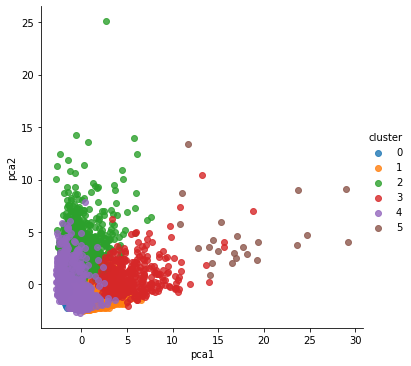

In [ ]:
import seaborn as sns
sns.lmplot(x='pca1', y='pca2', data=pca_df6, hue='cluster', fit_reg=False)

'\ndef animate(frame):\n  ax.view_init(30, frame/4)\n  plt.pause(.001)\n  return fig\nanim = animation.FuncAnimation(fig, animate, frames=800, interval=80)\nHTML(anim.to_html5_video())\n'

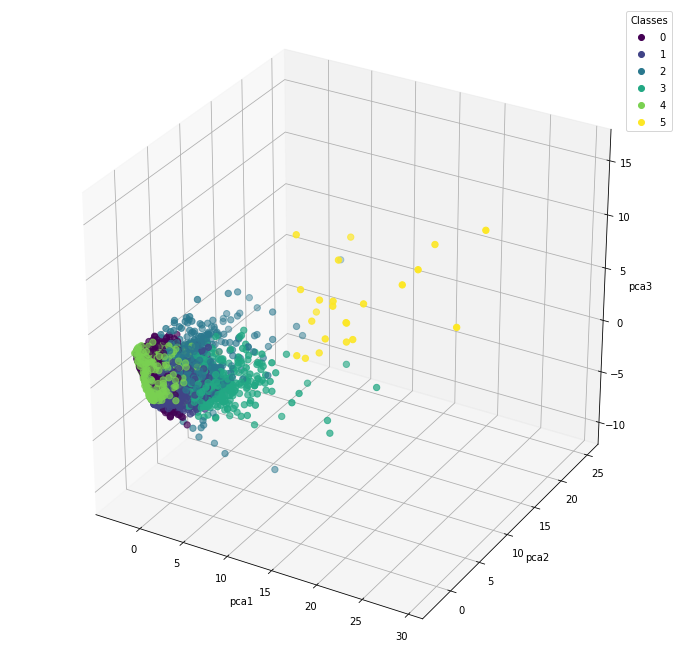

In [ ]:
from matplotlib import animation
from IPython.display import HTML
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(pca_df6['pca1'],pca_df6['pca2'],pca_df6['pca3'], c=list_cluster[4], s=40)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

'''
def animate(frame):
  ax.view_init(30, frame/4)
  plt.pause(.001)
  return fig
anim = animation.FuncAnimation(fig, animate, frames=800, interval=80)
HTML(anim.to_html5_video())
'''

Hmmm.... seems there is no clear separation between each class...

In [ ]:
val6 = silhouette_score(dataset_scaled, array[6])
print('Hierarchical 6 clusters, silhouette score: ' + val6)

val2 = silhouette_score(dataset_scaled, 2)
print('Hierarchical 2 clusters, silhouette score: ' + val2)

ValueError: ignored

2. DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

list_cluster = []
list_val = []
for i in range(1,10):
  db = DBSCAN(eps=i, min_samples=100)
  cluster = db.fit_predict(dataset_scaled)
  dfdb = dataset_scaled.copy()
  dfdb['cluster'] = int(cluster)
  dfdb = dfdb[dfdb['cluster']!=-1]
  X_dfdb = dfdb.drop(['cluster'], axis = 1)
  val = silhouette_score(X_dfdb, dfdb['cluster'])
  list_cluster.append(cluster)
  list_val.append(val)
  
plt.plot(range(1,10),list_val)
plt.title('Sil Score')
plt.xlabel('eps')
plt.ylabel('Score')
plt.show

[ 0 -1 -1 ... -1 -1 -1]


IndexError: ignored

3. HDBSCAN

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311926 sha256=c54e6fb43ef2c566541ca669ffaed9dc2cb9bb4b943eb44d35feaa9e321fdaa4
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
from hdbscan import HDBSCAN

In [ ]:
cluster = HDBSCAN().fit(dataset_scaled).labels_

In [ ]:
dfhdb = dataset.copy()
dfhdb['cluster'] = cluster
dfhdb = dfhdb[dfhdb['cluster']!=-1]

In [ ]:
pd.pivot_table(dfhdb, index=dfhdb.cluster, aggfunc=[np.mean,np.min,np.max])

mean                    ...          amax       
             BALANCE BALANCE_FREQUENCY  ... PURCHASES_TRX TENURE
cluster                                 ...                     
0         870.902264          1.000000  ...            85     12
1         151.493328          1.000000  ...            45     12
2          18.110472          0.539683  ...             8      7
3          71.886894          0.996364  ...            20     12
4          53.122299          0.951389  ...            17     10
5          60.695312          1.000000  ...             7      7
6          37.302874          1.000000  ...             9      8
7         669.988982          1.000000  ...             9      8
8          40.534161          1.000000  ...             7      7
9         112.464287          1.000000  ...            29     12
10       1001.891337          0.854167  ...             0      8
11       1403.223550          0.987500  ...             2     10
12         37.084799          0.990909  ...            12     10
13         20.412596          0.301435  ...            23     12
14         31.840194          0.981818  ...            19     11
15        103.490091          0.948052  ...            11     11
16       1104.021374          0.977961  ...             3     11
17       2259.531913          1.000000  ...             1     12
18         45.339572          1.000000  ...            16     12
19        872.036750          1.000000  ...            15     12
20       5281.404257          1.000000  ...             1     12
21         16.361059          0.318182  ...            12     12
22        248.531718          0.436363  ...             0     12
23         10.195732          0.348485  ...             4     12
24         18.920065          0.605572  ...            14     12
25         32.571466          0.317620  ...             6     12
26         61.522931          1.000000  ...            26     12
27         30.196582          0.893939  ...            17     12
28       4668.092879          1.000000  ...             0     12
29       3265.600662          1.000000  ...             0     12
30       2282.531639          1.000000  ...             0     12
31       1405.636822          1.000000  ...             0     12
32       1581.957255          1.000000  ...             0     12
33       1394.344050          1.000000  ...             1     12
34       1279.184312          1.000000  ...             4     12
35       2515.672555          1.000000  ...             0     12
36       1304.164731          1.000000  ...             0     12
37       2663.077217          1.000000  ...             0     12
38       1163.711963          1.000000  ...             5     12
39       1092.716228          1.000000  ...             4     12
40         30.028224          1.000000  ...            13     12
41        764.602873          1.000000  ...            14     12
42        478.514561          1.000000  ...             0     12
43        128.616581          1.000000  ...            10     12
44       1006.353227          1.000000  ...             9     12
45        227.720913          1.000000  ...             6     12
46       1144.558616          1.000000  ...             8     12
47        984.986396          1.000000  ...             3     12
48        141.905852          1.000000  ...             2     12
49       1042.372749          1.000000  ...             4     12
50       1422.549158          1.000000  ...             0     12
51       1093.152526          1.000000  ...             0     12
52        430.926018          1.000000  ...            23     12
53         24.900810          1.000000  ...            12     12

[54 rows x 51 columns]

In [ ]:
from collections import Counter
print(Counter(dfhdb.cluster == -1))

Counter({False: 1116})


What kind of clustering resulted in 53 clusters...

In [ ]:
X_dfhdb = dfhdb.drop(['cluster'], axis = 1)
val_hdb = silhouette_score(X_dfhdb, dfhdb['cluster'])

In [ ]:
val_hdb

-0.3255889887969518